In [49]:
import pandas as pd
import datetime as dt
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
pd.options
import random

In [145]:
spy = yf.download(['VOO'], period = '5y')

[*********************100%***********************]  1 of 1 completed


In [146]:
price_returns = spy.pct_change()
price_returns

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-24,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-26,-0.013015,0.024004,-0.001116,0.050588,0.050588,0.365515
2018-12-27,0.028034,0.008934,0.022204,0.009294,0.009294,-0.174133
2018-12-28,0.028525,0.012932,0.031512,-0.001272,-0.001272,-0.223659
2018-12-31,-0.000044,-0.004760,0.004106,0.009001,0.009001,-0.101155
...,...,...,...,...,...,...
2023-12-18,0.003347,0.004951,0.005113,0.005657,0.005657,-0.189591
2023-12-19,0.003221,0.004171,0.003453,0.006084,0.006084,-0.051162
2023-12-20,-0.001215,-0.002077,-0.013878,-0.018485,-0.014434,0.423907


In [147]:
window = 12
price_momentum = price_returns.rolling(window).sum()
price_momentum

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-24,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-26,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-27,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-12-18,0.037982,0.039217,0.042170,0.037973,0.037973,0.483158
2023-12-19,0.040510,0.037026,0.041590,0.038192,0.038192,0.303548
2023-12-20,0.039724,0.040868,0.029505,0.024732,0.028783,0.559602


In [148]:
mean_factor = price_momentum.mean()
std_factor = price_momentum.std()
mean_factor

Open         0.006998
High         0.006662
Low          0.006950
Close        0.007132
Adj Close    0.007925
Volume       0.782584
dtype: float64

In [149]:
z_score = (price_momentum - mean_factor) / std_factor
z_score

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-24,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-26,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-27,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-12-18,0.740244,0.827956,0.790172,0.742158,0.726310,-0.378020
2023-12-19,0.800645,0.772230,0.777153,0.747425,0.731600,-0.604773
2023-12-20,0.781873,0.869951,0.506038,0.423525,0.504165,-0.281510


In [150]:
z_score['Adj Close'].mean()

5.698017127186048e-17

In [151]:
long_basket = z_score[z_score['Adj Close'] >= z_score['Adj Close'].mean()]
print(long_basket)

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2019-01-11  1.657062  1.757258  1.976520  2.309012   2.300175 -1.865868
2019-01-14  1.892361  1.081604  1.949325  0.959131   0.944255 -2.276645
2019-01-15  1.310636  1.090082  1.573031  1.017232   1.002612 -0.890962
2019-01-16  0.906389  0.886452  1.107488  1.101121   1.086881 -0.865114
2019-01-17  0.835675  1.195543  0.961990  1.064093   1.049682 -1.050242
...              ...       ...       ...       ...        ...       ...
2023-12-18  0.740244  0.827956  0.790172  0.742158   0.726310 -0.378020
2023-12-19  0.800645  0.772230  0.777153  0.747425   0.731600 -0.604773
2023-12-20  0.781873  0.869951  0.506038  0.423525   0.504165 -0.281510
2023-12-21  0.669003  0.678330  0.529268  0.665416   0.747139 -0.016103
2023-12-22  0.610776  0.734360  0.694675  0.816523   0.898922 -0.723233

[748 rows x 6 columns]


In [152]:
long_basket['Adj Close']

Date
2019-01-11    2.300175
2019-01-14    0.944255
2019-01-15    1.002612
2019-01-16    1.086881
2019-01-17    1.049682
                ...   
2023-12-18    0.726310
2023-12-19    0.731600
2023-12-20    0.504165
2023-12-21    0.747139
2023-12-22    0.898922
Name: Adj Close, Length: 748, dtype: float64

In [153]:
short_basket = z_score[z_score['Adj Close'] < z_score['Adj Close'].mean()]
print(short_basket)

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2019-03-06  0.078242 -0.005616 -0.083515 -0.177132  -0.197098 -0.454594
2019-03-07 -0.132275 -0.314519 -0.347081 -0.412190  -0.433209  1.650139
2019-03-08 -0.588694 -0.558087 -0.555766 -0.516316  -0.537799  1.451635
2019-03-11 -0.375517 -0.114956 -0.240776 -0.077958  -0.097478  0.794965
2019-03-12 -0.080635 -0.098294 -0.068259 -0.136762  -0.156538  0.992614
...              ...       ...       ...       ...        ...       ...
2023-10-27 -1.366822 -1.476820 -1.425670 -1.619966  -1.646386 -0.088689
2023-10-30 -1.477971 -1.394309 -1.160067 -1.185770  -1.210247  0.039719
2023-10-31 -1.225151 -1.229523 -0.980257 -0.913391  -0.936648 -0.203879
2023-11-01 -0.979847 -0.965842 -0.932905 -0.900347  -0.923547 -0.380031
2023-11-02 -0.499147 -0.576389 -0.449086 -0.443701  -0.464858 -0.331867

[499 rows x 6 columns]


In [154]:
short_basket['Adj Close']

Date
2019-03-06   -0.197098
2019-03-07   -0.433209
2019-03-08   -0.537799
2019-03-11   -0.097478
2019-03-12   -0.156538
                ...   
2023-10-27   -1.646386
2023-10-30   -1.210247
2023-10-31   -0.936648
2023-11-01   -0.923547
2023-11-02   -0.464858
Name: Adj Close, Length: 499, dtype: float64

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

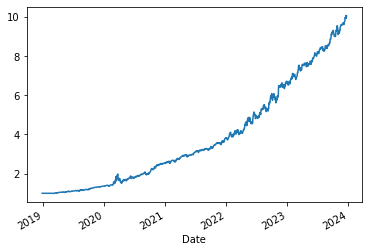

In [155]:
def my_strategy(data):    
    data['ma_50'] = data['Adj Close'].rolling(window=50).mean()
    data['position'] = 0
    data.loc[data['Adj Close'] > data['ma_50'], 'position'] = 1
    data.loc[data['Adj Close'] < data['ma_50'], 'position'] = -1
    return data
data = yf.download('VOO', period='5y')['Adj Close'].to_frame()
data_with_strategy = my_strategy(data.copy())
returns = data_with_strategy['Adj Close'].pct_change()
strategy_returns = returns * data_with_strategy['position']
cumulative_returns = (1 + strategy_returns).cumprod()
cumulative_returns.plot()

In [156]:
cumulative_returns.head()

Date
2018-12-24    NaN
2018-12-26    1.0
2018-12-27    1.0
2018-12-28    1.0
2018-12-31    1.0
dtype: float64

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

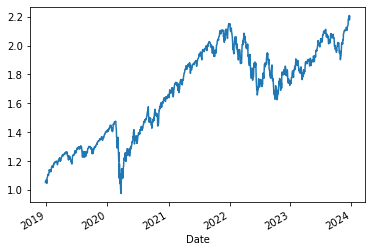

In [157]:
def my_strategy(data):
    data['position'] = 1
    return data
data = yf.download('VOO', period='5y')['Adj Close'].to_frame()
data_with_strategy = my_strategy(data.copy())
returns = data_with_strategy['Adj Close'].pct_change()
strategy_returns = returns * data_with_strategy['position']
cumulative_returns = (1 + strategy_returns).cumprod()
cumulative_returns.plot()

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

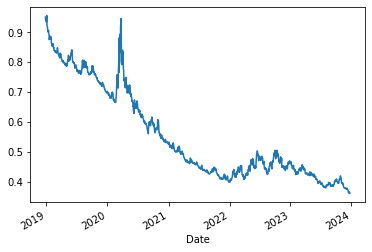

In [159]:
def my_strategy(data):
    data['position'] = -1 
    return data
data = yf.download('VOO', period='5y')['Adj Close'].to_frame()
data_with_strategy = my_strategy(data.copy())
returns = data_with_strategy['Adj Close'].pct_change()
strategy_returns = returns * data_with_strategy['position']

cumulative_returns = (1 + strategy_returns).cumprod()
cumulative_returns.plot()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


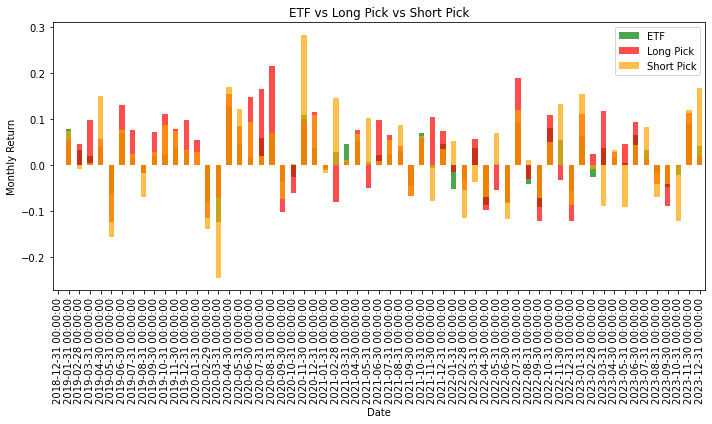

In [164]:
def my_strategy(data):
    data['ma_50'] = data['Adj Close'].rolling(window=50).mean()
    data['position'] = 0
    data.loc[data['Adj Close'] > data['ma_50'], 'position'] = 1
    data.loc[data['Adj Close'] < data['ma_50'], 'position'] = -1
    return data
etf_data = yf.download('VOO', period='5y')['Adj Close'].to_frame()
long_picks_data = yf.download('AAPL', period='5y')['Adj Close'].to_frame()
short_picks_data = yf.download('MS', period='5y')['Adj Close'].to_frame()
etf_data_with_strategy = my_strategy(etf_data.copy())
long_picks_data_with_strategy = my_strategy(long_picks_data.copy())
short_picks_data_with_strategy = my_strategy(short_picks_data.copy())
etf_monthly_returns = etf_data_with_strategy['Adj Close'].resample('M').ffill().pct_change()
long_picks_monthly_returns = long_picks_data_with_strategy['Adj Close'].resample('M').ffill().pct_change()
short_picks_monthly_returns = short_picks_data_with_strategy['Adj Close'].resample('M').ffill().pct_change()
fig, ax = plt.subplots(figsize=(10, 6))
etf_monthly_returns.plot(kind='bar', ax=ax, color='green', alpha=0.7)
long_picks_monthly_returns.plot(kind='bar', ax=ax, color='red', alpha=0.7)
short_picks_monthly_returns.plot(kind='bar', ax=ax, color='orange', alpha=0.7)
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Return')
ax.set_title('ETF vs Long Pick vs Short Pick')
ax.legend(['ETF', 'Long Pick', 'Short Pick'])
plt.tight_layout()
plt.show()

In [165]:
portfolio_data = yf.download(['AAPL','MS', 'JPM','MSFT','TSLA','TSTRX','AMZN'], period='5y')['Adj Close'] 
etf_data = yf.download('SPY', period='5y')['Adj Close']

portfolio_cumulative_returns = (portfolio_data.pct_change() + 1).cumprod() - 1
etf_cumulative_returns = (etf_data.pct_change() + 1).cumprod() - 1

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  1 of 1 completed


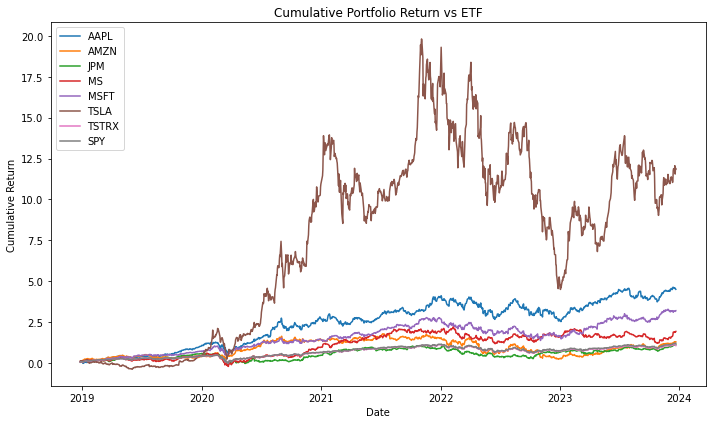

In [144]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(portfolio_cumulative_returns.index, portfolio_cumulative_returns, label= portfolio_data[0:7])
ax.plot(etf_cumulative_returns.index, etf_cumulative_returns, label='SPY')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.set_title('Cumulative Portfolio Return vs ETF')
ax.legend()
plt.tight_layout()